In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
#image specs
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)

In [0]:
# Size of noise vector used as input to Generator
z_dim = 100

In [0]:
def build_generator(img_shape, z_dim):
  model = Sequential()
  model.add(Dense(128, input_dim=z_dim))        #FC layer
  model.add(LeakyReLU(alpha=0.01))              #LeakyRelu activation
  model.add(Dense(28*28*1, activation='tanh'))  #op layr with tanh activation
  model.add(Reshape(img_shape))                 #Reshape generator op
  return model

In [0]:
def build_discriminator(img_shape):
  model = Sequential()
  model.add(Flatten(input_shape=img_shape))   #Flatten ip
  model.add(Dense(128))                       #FC layer
  model.add(LeakyReLU(alpha=0.01))            #LeakyRelu activation
  model.add(Dense(1, activation='sigmoid'))   #op layer for classification
  return model

In [0]:
def build_gan(generator, discriminator):
  model = Sequential()
  model.add(generator)
  model.add(discriminator)
  return model

In [7]:
#Build and compile Discriminator
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Adam())

#Build the generator
generator = build_generator(img_shape, z_dim)

#Keep discriminator parameters constant while generator is training
discriminator.trainable = False

#Build and compile GAN with discriminator fixed
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
losses = []
accuracies = []
iteration_checkpoint = []

def train(iteration, batch_size, sample_intervals):
  # Load mnist images
  (X_train, _), (_, _) = mnist.load_data()
  #X_train.append(X_test)
  
  # Rescale [0, 255] grayscale pixel values to [-1, 1]
  X_train = X_train / 127.5 - 1.0
  X_train = np.expand_dims(X_train, axis=3)
  
  #Labels for real images
  real = np.ones((batch_size, 1))
  
  #Labels for fake images
  fake = np.zeros((batch_size, 1))
  
  for i in range(iteration):
    # Training the discriminator
    
    # Get random batch of real images
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]
    
    # Generate batch of fakes
    z = np.random.normal(0, 1, (batch_size, 100))
    gen_imgs = generator.predict(z)
    
    # Train discriminator
    d_loss_real = discriminator.train_on_batch(imgs, real)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
    d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # Training the generator
    
    # Generate fake batch of images
    z = np.random.normal(0, 1, (batch_size, 100))
    gen_imgs = generator.predict(z)
    
    # Train geneerator
    g_loss = gan.train_on_batch(z, real)
    
    if (i + 1)%sample_interval == 0:
      # Save losses and accuracies
      losses.append((d_loss, g_loss))
      accuracies.append(accuracy * 100)
      iteration_checkpoint.append(i + 1)
      
      # Print training progress
      print("%d [D_loss: %f, acc.: %.2f%%] [G_loss: %f]" %(i + 1, d_loss, 100.0 * accuracy, g_loss))
      
      # output sample of generated images
      sample_images(generator)

In [0]:
def sample_images(generator, image_grid_rows=4, image_grid_columns=4):
  # sample random noise
  z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))
  
  # Generate images from random noise
  gen_imgs = generator.predict(z)

  # Rescale image pixel values to [0, 1]
  gen_imgs = 0.5 * gen_imgs + 0.5

  # Set image grid
  fig, axs = plt.subplots(image_grid_rows,
                          image_grid_columns,
                          figsize=(4, 4),
                          sharey=True,
                          sharex=True)
  
  cnt = 0
  for i in range(image_grid_rows):
    for j in range(image_grid_columns):
      # Output a grid of images
      axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
      axs[i, j].axis('off')
      cnt += 1

11493376/11490434 [==============================] - 1s 0us/step








1000 [D_loss: 0.025143, acc.: 100.00%] [G_loss: 3.843501]
2000 [D_loss: 0.110419, acc.: 96.88%] [G_loss: 5.770080]
3000 [D_loss: 0.785277, acc.: 69.53%] [G_loss: 2.802793]
4000 [D_loss: 0.160720, acc.: 96.09%] [G_loss: 4.108158]
5000 [D_loss: 0.308655, acc.: 88.67%] [G_loss: 3.607323]
6000 [D_loss: 0.417954, acc.: 84.38%] [G_loss: 3.736245]
7000 [D_loss: 0.143016, acc.: 94.92%] [G_loss: 4.159002]
8000 [D_loss: 0.238992, acc.: 91.80%] [G_loss: 4.667463]
9000 [D_loss: 0.457916, acc.: 80.86%] [G_loss: 3.647395]
10000 [D_loss: 0.196133, acc.: 92.58%] [G_loss: 4.643322]
11000 [D_loss: 0.178712, acc.: 92.19%] [G_loss: 4.275732]
12000 [D_loss: 0.355864, acc.: 84.77%] [G_loss: 4.047616]
13000 [D_loss: 0.329784, acc.: 85.55%] [G_loss: 3.084805]
14000 [D_loss: 0.262414, acc.: 90.23%] [G_loss: 3.721826]
15000 [D_loss: 0.337428, acc.: 87.11%] [G_loss: 3.207675]
16000 [D_loss: 0.331049, acc.: 83.98%] [G_loss: 3.079463]
17000 [

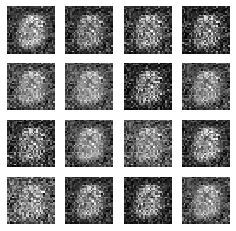

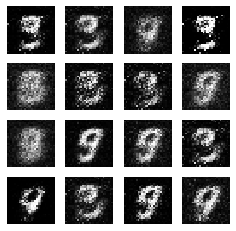

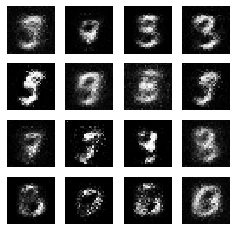

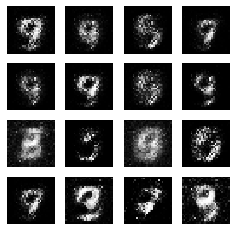

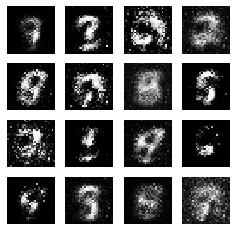

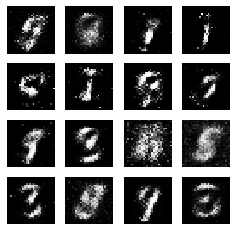

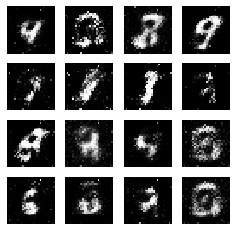

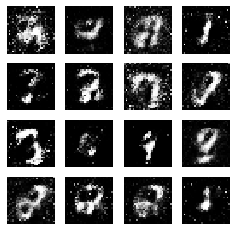

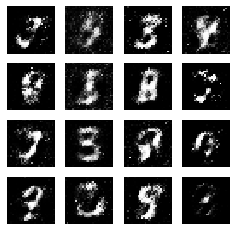

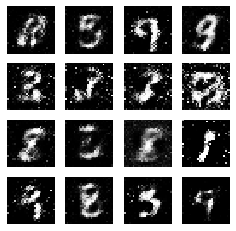

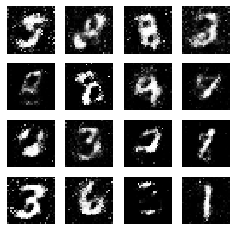

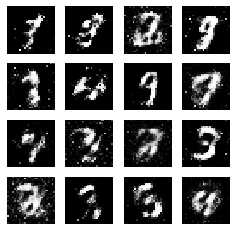

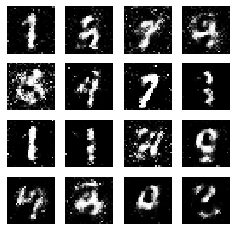

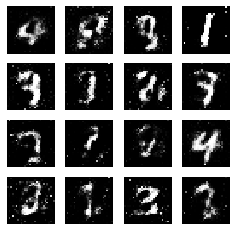

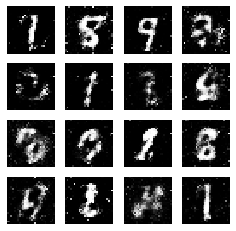

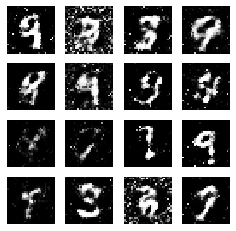

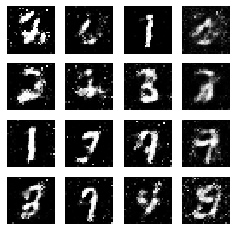

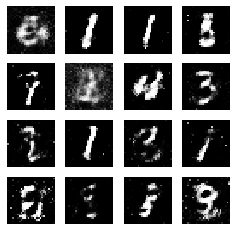

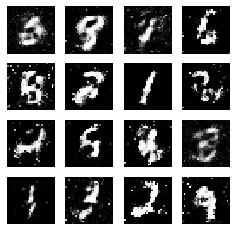

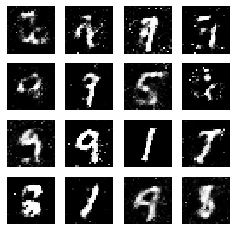

In [10]:
import warnings
warnings.filterwarnings('ignore')
# Set hyperparameters
iterations = 20000
batch_size = 128
sample_interval = 1000

# Train the GAN for the specified number of iterations
train(iterations, batch_size, sample_interval)

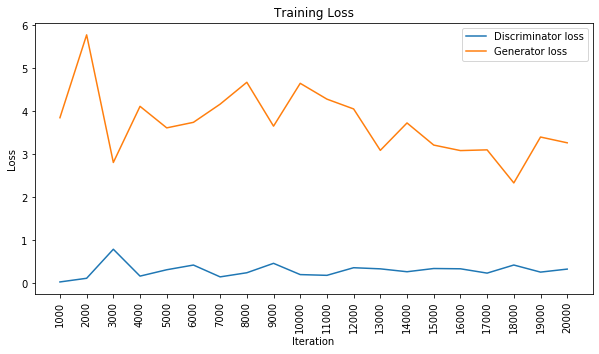

In [11]:
losses = np.array(losses)

# Plot training losses for Discriminator and Generator
plt.figure(figsize=(10, 5))
plt.plot(iteration_checkpoint, losses.T[0], label="Discriminator loss")
plt.plot(iteration_checkpoint, losses.T[1], label="Generator loss")

plt.xticks(iteration_checkpoint, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

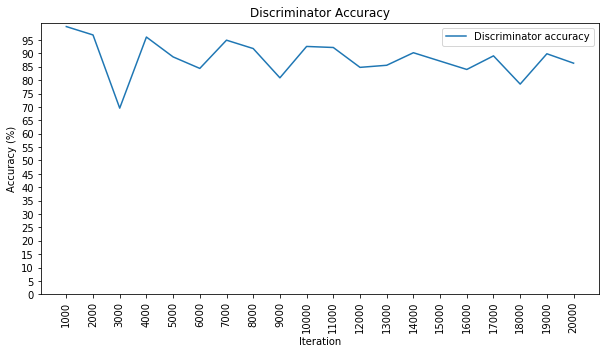

In [12]:
accuracies = np.array(accuracies)

# Plot Discriminator accuracy
plt.figure(figsize=(10, 5))
plt.plot(iteration_checkpoint, accuracies, label="Discriminator accuracy")

plt.xticks(iteration_checkpoint, rotation=90)
plt.yticks(range(0, 100, 5))

plt.title("Discriminator Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")
plt.legend()